In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/SepsisDataset/GSE13015_metadata.csv')
df


,database,submission_date,release_date,last_update_date,title,accession,type,source,organism,Age,...,data_processing,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,GEO,02-10-08,01-07-09,29-05-09,M016,GSM326090,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,39.000000,...,The data were analysed using BeadStudio versio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GEO,02-10-08,01-07-09,29-05-09,M017,GSM326091,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,52.000000,...,The data were analysed using BeadStudio versio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GEO,02-10-08,01-07-09,29-05-09,I016,GSM326092,RNA,Whole blood from septic patient with other inf...,Homo sapiens,61.000000,...,The data were analysed using BeadStudio versio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GEO,02-10-08,01-07-09,29-05-09,I017,GSM326093,RNA,Whole blood from septic patient with other inf...,Homo sapiens,50.000000,...,The data were analysed using BeadStudio versio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GEO,02-10-08,01-07-09,29-05-09,R007,GSM326094,RNA,Whole blood from patient who had recovered fro...,Homo sapiens,55.000000,...,The data were analysed using BeadStudio versio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,GEO,28-01-09,01-07-09,29-05-09,Rerun_I001,GSM365241,RNA,Whole blood from septic patient with other inf...,Homo sapiens,52.000000,...,The data were analysed using BeadStudio versio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,GEO,28-01-09,01-07-09,29-05-09,Rerun_I008,GSM365242,RNA,Whole blood from septic patient with other inf...,Homo sapiens,70.000000,...,The data were analysed using BeadStudio versio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1= df.drop(columns=['submission_date',	'release_date', 'last_update_date', 'Unnamed: 24',	'Unnamed: 25', 'Unnamed: 26','Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',	'Unnamed: 30', 'Unnamed: 31',	'Unnamed: 32', 'extract_protocol',	'label', 'label_protocol',	'hybridization_protocol',	'scan_protocol', 'data_processing'])
df1= df1.drop([106,107,108])
df1=df1.dropna(how='all')

df1
              


,database,title,accession,type,source,organism,Age,Gender,Ethnicity,Race,Illness,Treatment,Pathogen,molecule,description
0,GEO,M016,GSM326090,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,39.0,M,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,"Ceftazidime, Bactrim, Doxycycline",B.pseudomallei,total RNA,The subject was infected with B.pseudomallei
1,GEO,M017,GSM326091,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,52.0,F,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,"Norfloxacin, Ceftazolin",B.pseudomallei,total RNA,The subject was infected with B.pseudomallei
2,GEO,I016,GSM326092,RNA,Whole blood from septic patient with other inf...,Homo sapiens,61.0,F,Not Hispanic or Latino,Asian,Sepsis/Other infections,"Ceftazidime,Bactrim,Sulperazole",Staphylococcus coagulase negative,total RNA,The subject was infected with Staphylococcus c...
3,GEO,I017,GSM326093,RNA,Whole blood from septic patient with other inf...,Homo sapiens,50.0,M,Not Hispanic or Latino,Asian,Sepsis/Other infections,"Ceftriaxone, Ceftazidime, Doxycycline,Cloxacillin",Staphylococcus coagulase negative,total RNA,The subject was infected with Staphylococcus c...
4,GEO,R007,GSM326094,RNA,Whole blood from patient who had recovered fro...,Homo sapiens,55.0,F,Not Hispanic or Latino,Asian,Control/Recovery,NaN,NaN,total RNA,The subject had recovered from melioidosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,GEO,Rerun_M001,GSM365238,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,68.0,M,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,"Ceftazidime, Bactrim",B.pseudomallei,total RNA,The subject was infected with B.pseudomallei
102,GEO,Rerun_M002,GSM365239,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,43.0,F,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,"Ceftriaxone, Ceftazidime",B.pseudomallei,total RNA,The subject was infected with B.pseudomallei
103,GEO,Rerun_M006,GSM365240,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,46.0,M,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,Ceftriaxone,B.pseudomallei,total RNA,The subject was infected with B.pseudomallei
104,GEO,Rerun_I001,GSM365241,RNA,Whole blood from septic patient with other inf...,Homo sapiens,52.0,M,Not Hispanic or Latino,Asian,Sepsis/Other infections,Ceftriaxone,"Streptococcus non A,B",total RNA,The subject was infected with Streptococcus no...


In [5]:
for col in df.columns:
    print(col)

database
submission_date
release_date
last_update_date
title
accession
type
source
organism
Age
Gender
Ethnicity
Race
Illness
Treatment
Pathogen
molecule
extract_protocol
label
label_protocol
hybridization_protocol
scan_protocol
description
data_processing
Unnamed: 24
Unnamed: 25
Unnamed: 26
Unnamed: 27
Unnamed: 28
Unnamed: 29
Unnamed: 30
Unnamed: 31
Unnamed: 32


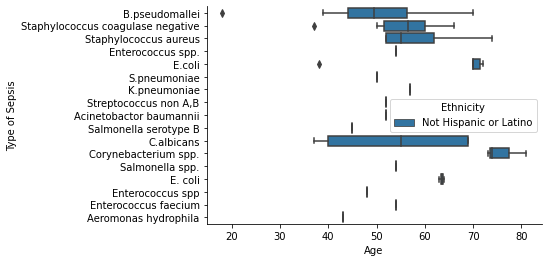

In [6]:
axes1=sns.boxplot(data=df1,x='Age',y='Pathogen', hue='Ethnicity')
axes1.set(xlabel='Age', ylabel='Type of Sepsis')
sns.despine()

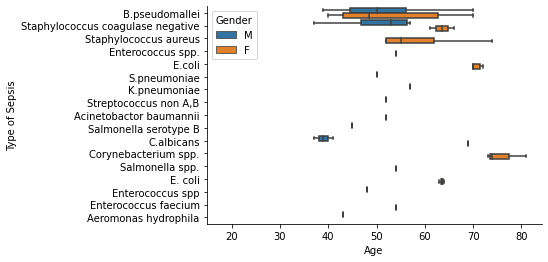

In [7]:
axes1=sns.boxplot(data=df1,x='Age',y='Pathogen', hue='Gender', fliersize=0)
axes1.set(xlabel='Age', ylabel='Type of Sepsis')
sns.despine()

In [8]:
df1.loc [(df1['Age'] >= 18) & (df1['Age'] <= 35) , 'age']= 'Young'
df1.loc [(df1['Age'] >= 36) & (df1['Age'] <= 64) , 'age']= 'Middle'
df1.loc [(df1['Age'] >= 65) , 'age']= 'Elderly'
df1.loc [(df1['Gender'] == 'F') , 'gender']= 'Female'
df1.loc [(df1['Gender'] == 'M') , 'gender']= 'Male'
df1

,database,title,accession,type,source,organism,Age,Gender,Ethnicity,Race,Illness,Treatment,Pathogen,molecule,description,age,gender
0,GEO,M016,GSM326090,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,39.0,M,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,"Ceftazidime, Bactrim, Doxycycline",B.pseudomallei,total RNA,The subject was infected with B.pseudomallei,Middle,Male
1,GEO,M017,GSM326091,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,52.0,F,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,"Norfloxacin, Ceftazolin",B.pseudomallei,total RNA,The subject was infected with B.pseudomallei,Middle,Female
2,GEO,I016,GSM326092,RNA,Whole blood from septic patient with other inf...,Homo sapiens,61.0,F,Not Hispanic or Latino,Asian,Sepsis/Other infections,"Ceftazidime,Bactrim,Sulperazole",Staphylococcus coagulase negative,total RNA,The subject was infected with Staphylococcus c...,Middle,Female
3,GEO,I017,GSM326093,RNA,Whole blood from septic patient with other inf...,Homo sapiens,50.0,M,Not Hispanic or Latino,Asian,Sepsis/Other infections,"Ceftriaxone, Ceftazidime, Doxycycline,Cloxacillin",Staphylococcus coagulase negative,total RNA,The subject was infected with Staphylococcus c...,Middle,Male
4,GEO,R007,GSM326094,RNA,Whole blood from patient who had recovered fro...,Homo sapiens,55.0,F,Not Hispanic or Latino,Asian,Control/Recovery,NaN,NaN,total RNA,The subject had recovered from melioidosis,Middle,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,GEO,Rerun_M001,GSM365238,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,68.0,M,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,"Ceftazidime, Bactrim",B.pseudomallei,total RNA,The subject was infected with B.pseudomallei,Elderly,Male
102,GEO,Rerun_M002,GSM365239,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,43.0,F,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,"Ceftriaxone, Ceftazidime",B.pseudomallei,total RNA,The subject was infected with B.pseudomallei,Middle,Female
103,GEO,Rerun_M006,GSM365240,RNA,Whole blood from patient with septicemic melio...,Homo sapiens,46.0,M,Not Hispanic or Latino,Asian,Sepsis/Melioidosis,Ceftriaxone,B.pseudomallei,total RNA,The subject was infected with B.pseudomallei,Middle,Male
104,GEO,Rerun_I001,GSM365241,RNA,Whole blood from septic patient with other inf...,Homo sapiens,52.0,M,Not Hispanic or Latino,Asian,Sepsis/Other infections,Ceftriaxone,"Streptococcus non A,B",total RNA,The subject was infected with Streptococcus no...,Middle,Male


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'Center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


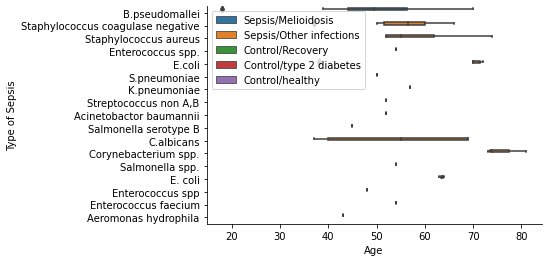

In [9]:
axes1=sns.boxplot(data=df1,x='Age',y='Pathogen', hue='Illness')
axes1.set(xlabel='Age', ylabel='Type of Sepsis')
plt.legend(loc='Center')
sns.despine()

In [23]:
df3 = df1.groupby(['Illness', 'gender']).size().reset_index()
df3= df3.rename(columns={0:'Gender Count'})
df3


,Illness,gender,Gender Count
0,Control/Recovery,Female,3
1,Control/Recovery,Male,6
2,Control/healthy,Female,5
3,Control/healthy,Male,3
4,Control/type 2 diabetes,Female,11
5,Control/type 2 diabetes,Male,1
6,Sepsis/Melioidosis,Female,14
7,Sepsis/Melioidosis,Male,26
8,Sepsis/Other infections,Female,24
9,Sepsis/Other infections,Male,13


In [31]:
df4 = df1.groupby(['Illness', 'age','gender']).size().reset_index()
df4= df4.rename(columns={0:'Age Count'})
df4


,Illness,age,gender,Age Count
0,Control/Recovery,Middle,Female,3
1,Control/Recovery,Middle,Male,6
2,Control/healthy,Elderly,Male,1
3,Control/healthy,Middle,Female,4
4,Control/healthy,Middle,Male,1
5,Control/healthy,Young,Female,1
6,Control/healthy,Young,Male,1
7,Control/type 2 diabetes,Elderly,Female,2
8,Control/type 2 diabetes,Middle,Female,9
9,Control/type 2 diabetes,Middle,Male,1


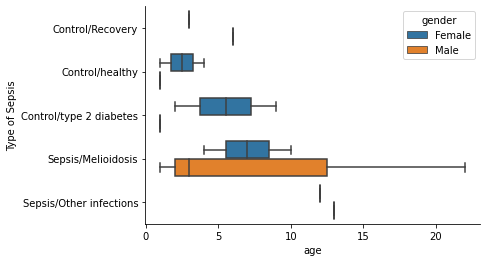

In [35]:
axes1=sns.boxplot(data=df4,x='Age Count',y='Illness', hue='gender')
axes1.set(xlabel='age', ylabel='Type of Sepsis')
sns.despine()